### Reading Data and Importing Modules

In [2]:
# Change working directory
import os
os.chdir("D:\Rice_Uni_Business_Analytics_Capstone\Data")

In [3]:
# Data files with extension .txt
txt_files = [item for item in os.listdir() if item.endswith(".txt")]
txt_files

['thads2001.txt',
 'thads2003.txt',
 'thads2005.txt',
 'thads2007.txt',
 'thads2009.txt',
 'thads2011.txt',
 'thads2013.txt']

In [4]:
# Columns slected to be used for analysis
usecols = ["CONTROL", "AGE1", "METRO3", "REGION", "LMED", "FMR", "IPOV", "BEDRMS", "BUILT", "STATUS", 
           "TYPE", "VALUE", "NUNITS","ROOMS", "PER", "ZINC2", "ZADEQ", "ZSMHC", "STRUCTURETYPE", 
           "OWNRENT", "UTILITY", "OTHERCOST", "COST06", "COST08","COST12", "COSTMED", "ASSISTED"]

In [5]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from scipy import stats
import warnings

In [6]:
data_2001 = pd.read_csv("thads2001.txt", sep=",", usecols=usecols)
data_2003 = pd.read_csv("thads2003.txt", sep=",", usecols=usecols)
data_2005 = pd.read_csv("thads2005.txt", sep=",", usecols=usecols)
data_2007 = pd.read_csv("thads2007.txt", sep=",", usecols=usecols)
data_2009 = pd.read_csv("thads2009.txt", sep=",", usecols=usecols)
data_2011 = pd.read_csv("thads2011.txt", sep=",", usecols=usecols)
data_2013 = pd.read_csv("thads2013.txt", sep=",", usecols=usecols)

### Data Manipulation and Statistical Analysis

In [7]:
# Initialize a list
size_list = []
# Iterate over the length of txt_files to append the size of each file to the size_list. Select 
# only market values that are $1000 or more
for i in range(len(txt_files)):
    df = pd.read_csv(txt_files[i], sep=",", usecols=usecols)
    df = df[df["VALUE"] >= 1000]
    size_list.append(df.shape[0])

In [8]:
# Print the size of each file as formated below
years = range(2001, 2015, 2)
for i in range(len(txt_files)):
    print("The number of housing units that have market values of $1,000 or more in {} is {}"
          .format(years[i], size_list[i]))

The number of housing units that have market values of $1,000 or more in 2001 is 29381
The number of housing units that have market values of $1,000 or more in 2003 is 33434
The number of housing units that have market values of $1,000 or more in 2005 is 30514
The number of housing units that have market values of $1,000 or more in 2007 is 27785
The number of housing units that have market values of $1,000 or more in 2009 is 31317
The number of housing units that have market values of $1,000 or more in 2011 is 85050
The number of housing units that have market values of $1,000 or more in 2013 is 36675


In [9]:
# Extract the names of the dataframes
def get_df_name(df):
    '''Extract the name of the data frame. Input of the function is the dataframe df'''
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [10]:
# Change names of the `VALUE` and `STATUS` variables to match the year
def column_name_change(df):
    '''Change the names of the VALUE and STATUS columns. Input is a dataframe'''
    df.rename(columns={"VALUE": "VALUE_{}".format(get_df_name(df)[-4:]), 
                       "STATUS": "STATUS_{}".format(get_df_name(df)[-4:]), 
                       "FMR": "FMR_{}".format(get_df_name(df)[-4:])}, inplace = True)

In [11]:
# Test
get_df_name(data_2001)

'data_2001'

In [12]:
dfs = [data_2005, data_2007, data_2009, data_2011, data_2013]
for df_name in dfs:
    column_name_change(df_name)

In [13]:
# Now what is the average market value (in $) across all housing units for year 2005
data_2005[data_2005["VALUE_2005"] >= 1000]["VALUE_2005"].mean()

246504.11244019138

In [14]:
# Subsets of the dataframes - market value is $1000 or more
def f(df, x):
    return df[df[x] >= 1000]

In [15]:
# A list of the yearly market value variables
yearly_value = ["VALUE_2005", "VALUE_2007", "VALUE_2009", "VALUE_2011", "VALUE_2013"]
# A list of yearly status
yearly_status = ["STATUS_2005", "STATUS_2007", "STATUS_2009", "STATUS_2011", "STATUS_2013"]
# A list of the dataframes of the years 2005 through 2013
dfs = [data_2005, data_2007, data_2009, data_2011, data_2013]

# Initialize the status list
status = []
# Iterate over the yearly data and group it by status to count the number of occupied vs. vacant apartments in these housing 
# units
for i in range(len(yearly_value)):
    status.append(f(dfs[i], yearly_value[i]).groupby([yearly_status[i]])[yearly_status[i]].count())

# Convert the list to a datafram
status_df = pd.DataFrame(status)    # '1': occupied, '3': not occupied
# Rename columns to Occupied and Vacant, respectively
status_df.rename(columns={"'1'": 'Occupied', "'3'": 'Vacant'}, inplace=True)

<Axes: title={'center': 'Vacant Houses'}, ylabel='Vacant'>

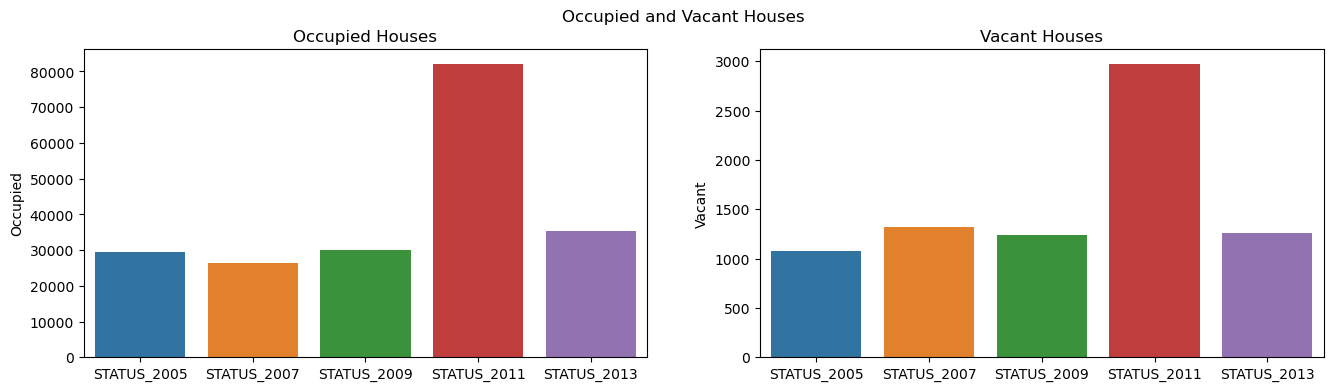

In [16]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,4))
fig.suptitle('Occupied and Vacant Houses')
axes[0].set_title('Occupied Houses')
axes[1].set_title('Vacant Houses')
sns.barplot(ax = axes[0], x = status_df.index, y = status_df.Occupied)
sns.barplot(ax = axes[1], x = status_df.index, y = status_df.Vacant)

In [17]:
# Comparison of the average market value between occupied and vacant housing units 
df_2007_sub = f(data_2007[["STATUS_2007", "VALUE_2007"]], "VALUE_2007")
df_2007_sub.groupby("STATUS_2007").mean().round(2)

,VALUE_2007
STATUS_2007,
'1',278960.75
'3',289004.49


In [18]:
# Standard deviation
df_2007_sub.groupby("STATUS_2007").std().round(2)

,VALUE_2007
STATUS_2007,
'1',317162.77
'3',306203.82


In [19]:
# Now mean and standard deviation for 2013
df_2013_sub = f(data_2013[["STATUS_2013", "VALUE_2013"]], "VALUE_2013")
print(df_2013_sub.groupby("STATUS_2013").mean().round(2))
print(df_2013_sub.groupby("STATUS_2013").std().round(2))

             VALUE_2013
STATUS_2013            
'1'           249858.55
'3'           251996.82
             VALUE_2013
STATUS_2013            
'1'           282290.65
'3'           389653.09


In [20]:
# Report the t-statistic from the difference in means test using the 2011 data

# Two-sample independent t-test

# 1. Import stats library from scipy
from scipy import stats

# 2. Prepare data
occupied_2011 = f(data_2011, "VALUE_2011")[f(data_2011, "VALUE_2011")["STATUS_2011"] == "'1'"]["VALUE_2011"]
vacant_2011 = f(data_2011, "VALUE_2011")[f(data_2011, "VALUE_2011")["STATUS_2011"] == "'3'"]["VALUE_2011"]

# 3. Calculate the t-statistic and p-value
t_stat, p_value = stats.ttest_ind(occupied_2011, vacant_2011)
print(round(t_stat, 4), round(p_value, 4))

6.397 0.0


In [21]:
# Now the t-statistic from the difference in means test using the 2013 data
occupied_2013 = f(data_2013, "VALUE_2013")[f(data_2013, "VALUE_2013")["STATUS_2013"] == "'1'"]["VALUE_2013"]
vacant_2013 = f(data_2013, "VALUE_2013")[f(data_2013, "VALUE_2013")["STATUS_2013"] == "'3'"]["VALUE_2013"]

# 3. Calculate the t-statistic and p-value
t_stat_2013, p_value_2013 = stats.ttest_ind(occupied_2013, vacant_2013)
print(round(t_stat_2013, 4), round(p_value_2013, 4))

-0.2599 0.7949


In [22]:
def diff_in_means_test(df, x, y):
    '''Difference in means test for current market vlaues of occupied vs. vacant housing units.
    Inputs: dataframe df, x: column name (string), y: column name (string) 
    '''
    occupied = f(df, x)[f(df, x)[y] == "'1'"][x]
    vacant = f(df, x)[f(df, x)[y] == "'3'"][x]
    t_stat, p_value = stats.ttest_ind(occupied, vacant)
    return round(t_stat, 4), round(p_value, 4)

In [23]:
# Years
years_2 = range(2005, 2015, 2)
# Empty dictionary for the t statistics values
t_stats = {}
# Empty dictionary for the p-values
p_values = {} 
# Iterate over the length of the names of dataframes within the list dfs to populate the above dictionaries
for i in range(len(dfs)):
    t_stats[years_2[i]] = diff_in_means_test(dfs[i], yearly_value[i], yearly_status[i])[0]
    p_values[years_2[i]] = diff_in_means_test(dfs[i], yearly_value[i], yearly_status[i])[1]

In [24]:
pd.melt(pd.DataFrame([t_stat])).rename(columns={"variable": "Year", "value": "t_stat"})

,Year,t_stat
0,0,6.397


In [25]:
pd.melt(pd.DataFrame([p_values])).rename(columns={"variable": "Year", "value": "p_value"})

,Year,p_value
0,2005,0.0416
1,2007,0.2609
2,2009,0.8465
3,2011,0.0000
4,2013,0.7949


In [26]:
# Similar to the above, but the test is one sided t-test
def one_sided_ttest(df, x, y):
    occupied = f(df, x)[f(df, x)[y] == "'1'"][x]
    vacant = f(df, x)[f(df, x)[y] == "'3'"][x]
    t_stat, p_value = stats.ttest_ind(occupied, vacant, alternative = 'less')
    return round(t_stat, 4), round(p_value, 4)

In [27]:
t_stats_one = {}
p_values_one = {} 

for i in range(len(dfs)):
    p_values_one[years_2[i]] = one_sided_ttest(dfs[i], yearly_value[i], yearly_status[i])[1]

In [28]:
pd.melt(pd.DataFrame([p_values_one])).rename(columns={"variable": "Year", "value": "p_value"})

,Year,p_value
0,2005,0.9792
1,2007,0.1305
2,2009,0.4232
3,2011,1.0000
4,2013,0.3975


In [29]:
# Merge all the data frames (2005 through 2013)
yearly_fmr = data_2005[["CONTROL", "FMR_2005"]].merge(
    data_2007[["CONTROL", "FMR_2007"]], on="CONTROL").merge(
    data_2009[["CONTROL", "FMR_2009"]], on="CONTROL").merge(
    data_2011[["CONTROL", "FMR_2011"]], on="CONTROL").merge(
    data_2013[["CONTROL", "FMR_2013"]], on="CONTROL")

In [30]:
yearly_fmr.head()

,CONTROL,FMR_2005,FMR_2007,FMR_2009,FMR_2011,FMR_2013
0,'100007130148',519,616,685,711,737
1,'100007390148',600,605,670,673,657
2,'100007540148',788,807,897,935,988
3,'100008700141',702,778,743,796,773
4,'100009170148',546,599,503,531,552


In [31]:
fmr_columns = []
warnings.filterwarnings("ignore")
for column in list(yearly_fmr.columns):
    if column.startswith("FMR"):
        fmr_columns.append(column)

yearly_fmr_sub = yearly_fmr

for fmr in fmr_columns:
    yearly_fmr_sub = yearly_fmr_sub[yearly_fmr[fmr] > 0]
yearly_fmr_sub.shape

(26373, 6)

In [32]:
# Test
fmr_min = []
for fmr in fmr_columns:
    fmr_min.append(yearly_fmr_sub[fmr].min())
fmr_min

[360, 387, 427, 424, 421]

In [33]:
fmr_yearly_avgs = []
warnings.filterwarnings("ignore")
for i in range(5):
    fmr_yearly_avgs.append(round(yearly_fmr_sub.describe().loc['mean'][i],2))
fmr_yearly_avgs

[929.04, 977.77, 1063.87, 1116.38, 1151.57]

In [34]:
# Paired ttest
def paired_ttest(x, y):
    t_stat, p_value = stats.ttest_rel(yearly_fmr_sub[x], yearly_fmr_sub[y])
    return round(t_stat, 4), round(p_value, 4)

In [35]:
t_stats_paired = []
p_values_paired = []
fmrs = ["FMR_2005", "FMR_2007", "FMR_2009", "FMR_2011", "FMR_2013"]

for i in range(1, len(fmrs)):
    t_stats_paired.append(paired_ttest(fmrs[i], fmrs[i-1])[0])

t_stats_paired

[69.4904, 124.3222, 74.1512, 58.2109]

In [36]:
# OR
for i in range(1, len(fmrs)):
    print("The t-statistic for the difference in means test for the years {} and {} is {}".
          format(fmrs[i-1][-4:], fmrs[i][-4:], paired_ttest(fmrs[i], fmrs[i-1])[0]))

The t-statistic for the difference in means test for the years 2005 and 2007 is 69.4904
The t-statistic for the difference in means test for the years 2007 and 2009 is 124.3222
The t-statistic for the difference in means test for the years 2009 and 2011 is 74.1512
The t-statistic for the difference in means test for the years 2011 and 2013 is 58.2109


In [37]:
def percent_increase_fmr(x, y):
    return((yearly_fmr_sub[y] - yearly_fmr_sub[x]) / yearly_fmr_sub[x] * 100)

In [38]:
for i in range(1, len(fmrs)):
    print("The average percent increase in fair market rent between {} and {} is {}%".
          format(fmrs[i-1][-4:], fmrs[i][-4:], 
                 round(percent_increase_fmr(fmrs[i-1], fmrs[i]).mean(),2)))

The average percent increase in fair market rent between 2005 and 2007 is 6.21%
The average percent increase in fair market rent between 2007 and 2009 is 9.28%
The average percent increase in fair market rent between 2009 and 2011 is 5.09%
The average percent increase in fair market rent between 2011 and 2013 is 3.77%


In [39]:
# lets draw a line chart for the fair market values for the years 2005 through 2013
years = [2005, 2007, 2009, 2011, 2013]
fmr_yearly_data = pd.DataFrame({"year": years, "avg_yearly_fmr": fmr_yearly_avgs})
fmr_yearly_data

,year,avg_yearly_fmr
0,2005,929.04
1,2007,977.77
2,2009,1063.87
3,2011,1116.38
4,2013,1151.57


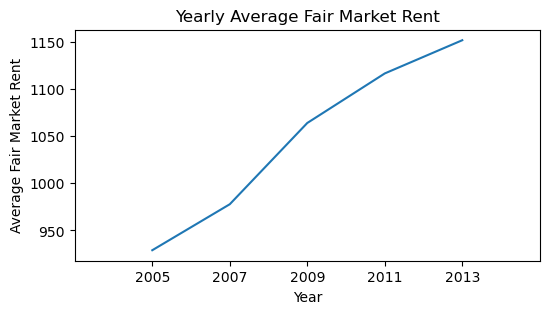

In [40]:
fig, ax = plt.subplots(figsize=(6, 3))
warnings.filterwarnings("ignore")
sns.lineplot(data = fmr_yearly_data, x = "year", y = "avg_yearly_fmr", ax=ax)
ax.set_xlim(2003,2015)
ax.set_xticks(range(2005,2015,2))
plt.title("Yearly Average Fair Market Rent")
plt.xlabel("Year")
plt.ylabel("Average Fair Market Rent");

In [41]:
fvalue, pvalue = stats.f_oneway(yearly_fmr_sub["FMR_2005"], yearly_fmr_sub["FMR_2007"], 
                               yearly_fmr_sub["FMR_2009"], yearly_fmr_sub["FMR_2011"],
                               yearly_fmr_sub["FMR_2013"])
print(fvalue, pvalue)

1706.7912624191479 0.0


## Data from 2013 for Linear Regression Analysis - Owned Single Family House Units

#### Define the Variables used in Remaining Analysis for the Year 2013

- CONTROL	Character: A control variable for Housing Unit. Useful to match data across datasets from different years.
- AGE1: Age of head of household
- METRO3 - a character variable with options ‘1’,’2’, ‘3’, ‘4’ or ‘5’ where ‘1’ : Central City, ‘2’, ‘3’, ‘4’, ‘5’ :Others
- REGION	Character ‘1’,’2’, ‘3’ or ‘4’. The four census regions—Northeast, Midwest, South, and West. 
- LMED (Numerical, \$\): Area Median Income
- FMR (Numerical, \$\): Fair Market Monthly Rent
- IPOV (Numerical, \$\): Poverty Income threshold
- BEDRMS (Numerical): Number of Bedrooms in the unit
- BUILT (Numerical): Year the unit was built
- STATUS (Character) ‘1’, ‘3’ 	Occupied or Vacant
- TYPE (Numerical): Structure Type
    - 1 	House, apartment, flat 
    - 2 	Mobile home with no permanent room added 
    - 3 	Mobile home with permanent room added
    - 4 	HU, in nontransient hotel, motel, etc
    - 5 	HU, in permanent transient hotel, motel, etc
    - 6 	HU, in rooming house
    - 7 	Boat or recreation vehicle
    - 9 	HU, not specified above
- VALUE	(Numerical, \$\)): Current market value of unit
- NUNITS (Numerical): Number of Units in Building
- ROOMS	(Numerical): Number of rooms in the unit
- PER (Numerical): Number of persons in Household
- ZINC2 (Numerical): Annual Household income
- ZADEQ	(Character): Adequacy of unit - ‘1’: Adequate, '2’: Moderately Inadequate, '3’: Severely Inadequate, ‘-6’: Vacant - No information
- ZSMHC	(Numerical, \$\): Monthly housing costs. For renters, housing cost is contract rent plus utility costs. For Owners, mortgage is not included
- STRUCTURETYPE (Numerical)	Structure Type
    - 1 	Single Family
    - 2 	2-4 units
    - 3 	5-19 units
    - 4 	20-49 units
    - 5 	50+ units
    - 6 	Mobile Home
    - -9 	Not Known
- OWNRENT (Character), ‘1’,  ‘2’	
    - ‘1’:	Owner: Owner occupied, vacant for sale, and sold but not occupied.
    - ‘2’: 	Rental: Occupied units rented for cash and without payment of cash rent. Vacant for rent, vacant for rent or sale, and rented but not occupied.
- UTILITY (Numerical \$)	Monthly utilities cost (gas, oil, electricity, other fuel, trash collection, and water)
- OTHERCOST	(Numerical \$)	Sum of ‘other monthly costs’ such as Home owners’ or renters’ insurance, Land rent (where distinct from unit rent), Condominium fees (where applicable), Other mobile home fees (where applicable).
- COST06 (Numerical \$): Monthly mortgage payments assuming 6% interest. This applies only to “Owners”.
- COST08 (Numerical \$): Monthly mortgage payments assuming 8% interest. This applies only to “Owners”.
- COST12 (Numerical \$): Monthly mortgage payments assuming 12% interest. This applies only to “Owners”.
- COSTMED	(Numerical \$): Monthly mortgage payments assuming median interest. This applies only to “Owners”.
- ASSISTED (Numerical)	Did the housing unit receive some governmental ‘assistance”? 
    - 0 	Not assisted
    - 1 	Assisted
    - -9 	Not Known

In the proceeding analysis, only data from 2013 will be used. Owned single family housing units will be considered for the rest of the analysis. The data will be used to build a multiple linear regression model that would predict the current market values of housing units based on a set of explanatory features. 

In [42]:
# Read the 2013 into a different dataframe than the one used before
data_2013_df = pd.read_csv("thads2013.txt", sep=",", usecols=usecols)
data_2013_df.shape

(64535, 27)

#### Data Processing and Manipulation

In [43]:
def owned_single_family_housing(df, x = "VALUE", value=1000, type=1, structure_type=1, owned="'1'"):
    '''The function inputs a dataframe, a variable name x to condition over, with default values
    of value of $1000, type=1 (house), structure_type=1 (single family), and owned house'''
    return df[(df[x] >= value) & 
              (df["TYPE"] == type) & 
              (df["STRUCTURETYPE"] == structure_type) &
              (df["OWNRENT"] == owned)].reset_index(drop=True)
owned_single_family_housing_df = owned_single_family_housing(data_2013_df)

In [44]:
owned_single_family_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32825 entries, 0 to 32824
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CONTROL        32825 non-null  object 
 1   AGE1           32825 non-null  int64  
 2   METRO3         32825 non-null  object 
 3   REGION         32825 non-null  object 
 4   LMED           32825 non-null  int64  
 5   FMR            32825 non-null  int64  
 6   IPOV           32825 non-null  int64  
 7   BEDRMS         32825 non-null  int64  
 8   BUILT          32825 non-null  int64  
 9   STATUS         32825 non-null  object 
 10  TYPE           32825 non-null  int64  
 11  VALUE          32825 non-null  int64  
 12  NUNITS         32825 non-null  int64  
 13  ROOMS          32825 non-null  int64  
 14  PER            32825 non-null  int64  
 15  ZINC2          32825 non-null  int64  
 16  ZADEQ          32825 non-null  object 
 17  ZSMHC          32825 non-null  int64  
 18  STRUCT

In [45]:
owned_single_family_housing_df.drop(columns=["TYPE", "STRUCTURETYPE", "OWNRENT"], inplace=True)

In [46]:
# In the METRO3 (metropolitan status) variable, replace '1' with Central City and '2', '3', '4', or '5'
# with Other
import numpy as np
owned_single_family_housing_df["METRO3"] = np.where(owned_single_family_housing_df.METRO3 == "'1'",
                                                   "central_city", "Other")

In [47]:
# STATUS variable: '1': Occupied, '3': Vacant
owned_single_family_housing_df["STATUS"] = np.where(owned_single_family_housing_df.STATUS == "'1'",
                                                   "occupied", "vacant")

In [48]:
owned_single_family_housing_df.replace({"REGION":{"'1'": "Northeast", "'2'": "Midwest", 
                                                 "'3'": "South", "'4'": "West"}}, inplace = True)

In [49]:
owned_single_family_housing_df.replace({"ZADEQ":{"'1'": "Adequate", "'2'": "Moderately_inadequate",
                    "'3'": "Severely_inadequate", "'-6'": "Vacant_No_Info"}}, inplace = True)

In [50]:
owned_single_family_housing_df.replace({"ASSISTED":{0:"Not_Assisted", 1:"Assisted", -9:"Not_known"}}, 
                                        inplace=True)

In [51]:
owned_single_family_housing_df.describe()

,AGE1,LMED,FMR,IPOV,BEDRMS,BUILT,VALUE,NUNITS,ROOMS,PER,ZINC2,ZSMHC,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED
count,32825.000000,32825.000000,32825.000000,32825.000000,32825.000000,32825.000000,3.282500e+04,32825.0,32825.000000,32825.000000,3.282500e+04,32825.000000,32825.000000,32825.000000,32825.000000,32825.000000,32825.000000,32825.000000
mean,53.624158,68158.426078,1277.328835,17184.712628,3.251942,1967.431104,2.573874e+05,1.0,6.730967,2.365362,8.488523e+04,1311.889992,245.215319,95.374486,2051.174528,3045.090902,2362.079521,1836.053536
std,19.027382,12502.711452,396.375112,6657.658062,0.848657,26.742731,2.826902e+05,0.0,1.649389,2.070924,8.565889e+04,1087.194787,123.231149,104.399267,1961.990997,3051.403698,2302.542808,1726.568892
min,-9.000000,38500.000000,421.000000,-6.000000,0.000000,1919.000000,1.000000e+04,1.0,2.000000,-6.000000,-1.170000e+02,-6.000000,0.000000,0.000000,66.459547,105.075134,78.538812,58.101678
25%,43.000000,60060.000000,1004.000000,13948.000000,3.000000,1950.000000,1.100000e+05,1.0,6.000000,2.000000,3.000000e+04,550.000000,165.000000,41.666667,1011.974114,1428.901605,1141.132406,919.600112
50%,55.000000,64810.000000,1204.000000,15470.000000,3.000000,1970.000000,1.800000e+05,1.0,7.000000,2.000000,6.397400e+04,1057.000000,222.666667,70.000000,1546.190945,2263.760874,1770.776233,1391.950224
75%,66.000000,74008.000000,1445.000000,23401.000000,4.000000,1990.000000,3.000000e+05,1.0,8.000000,4.000000,1.092000e+05,1740.000000,299.000000,108.333333,2441.455512,3624.254012,2814.497683,2187.058726
max,93.000000,115300.000000,3511.000000,51635.000000,7.000000,2013.000000,2.520000e+06,1.0,15.000000,20.000000,1.061921e+06,10667.000000,1249.000000,2020.916667,19261.472577,28992.600365,22305.447202,17155.289494


In [52]:
# Numeric fields that each have values less than 0
x = list(owned_single_family_housing_df
                 .describe()
                 .min()[owned_single_family_housing_df.describe().min() <= 0]
                 .index)
print(x)

['AGE1', 'IPOV', 'BEDRMS', 'NUNITS', 'PER', 'ZINC2', 'ZSMHC', 'UTILITY', 'OTHERCOST']


In [53]:
owned_single_family_housing_df = owned_single_family_housing_df[
    (owned_single_family_housing_df[x] > 0).all(axis=1)]
minimums = pd.DataFrame(owned_single_family_housing_df.describe().min())
min_field_vals = minimums.rename(columns={0: "Minimum"}).reset_index().rename(
    columns={"index": "Field"}).sort_values(by = "Minimum")
min_field_vals.reset_index(inplace=True, drop=True)

Now, all the numeric fields have positive values that are 0 or more as shown in the above summary statistics table. All of the numeric fields have a minimum value that is 0 or more.

In [54]:
owned_single_family_housing_df.shape

(30174, 24)

### Exploratory Data Analysis

In [55]:
# Descriptive statistics for the outcome variable "VALUE"
value_descriptive_statistics = pd.DataFrame(owned_single_family_housing_df["VALUE"].describe().round(2)).reset_index()
value_descriptive_statistics.rename(columns={"index": "Statistics", "VALUE": "Value"})

,Statistics,Value
0,count,30174.00
1,mean,262685.76
2,std,281724.78
3,min,10000.00
4,25%,120000.00
5,50%,190000.00
6,75%,310000.00
7,max,2520000.00


In [56]:
value_descriptive_statistics.to_csv("value.csv")

In [57]:
# Summary statistics for categorical variables
owned_single_family_housing_df.describe(include='object')

,CONTROL,METRO3,REGION,STATUS,ZADEQ,ASSISTED
count,30174,30174,30174,30174,30174,30174
unique,30174,2,4,1,3,1
top,'100003130103',Other,Midwest,occupied,Adequate,Not_known
freq,1,23750,9015,30174,29478,30174


From the table above, all of the remaining 30,174 housing units are occupied. Therefore, the variable `STATTUS` will not be included in the regression model, because it will not add any information to the final model. In addition, since about 98% (29,478 out of 30,174) of the housing units have adequate space in the response of the Variable `ZADEQ`, it will not be included in the linear regression model. Therefore the variables `STATUS` AND `ZADEQ` will be dropped from the above dataframe.  

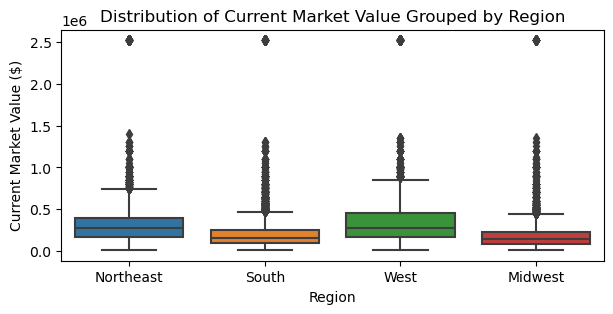

In [58]:
plt.figure(figsize=(7,3))
sns.boxplot(owned_single_family_housing_df, x='REGION', y='VALUE')
plt.ylabel("Current Market Value ($)")
plt.xlabel("Region")
plt.title("Distribution of Current Market Value Grouped by Region");

In [59]:
# Average current market value in each region 
pd.DataFrame(owned_single_family_housing_df.groupby("REGION")["VALUE"].
             mean().round()).sort_values(by="VALUE").reset_index()

,REGION,VALUE
0,Midwest,186871.0
1,South,216831.0
2,Northeast,328229.0
3,West,387586.0


All 4 regions have the same maximum market value of \\$2.52 million, and the same minimum of \\$10,000. However, the average market value ranges between \\$186,871 in the Midwest and \\$387,586 in the West. On average, housing units in the Midwest and South are much cheaper than those in the Northeast and the West. 

In [60]:
# Use pivot table to count the number of housing units each year and estimate their market values
tbl = pd.pivot_table(owned_single_family_housing_df, values=["VALUE"],
            index=['BUILT'], aggfunc={"mean", "count"}).reset_index().round()
# Extract the mean and count from the above tbl datafram
units_stats = tbl["VALUE"]
# Rename columns
units_stats.rename(columns={"mean": "yearly_avg_value", "count": "number_of_units"}, inplace=True)

In [61]:
# Concatenate the year to the mean of market values and the count of housing unitrs
units_df = pd.concat([pd.DataFrame(tbl["BUILT"]), units_stats], axis=1)
units_df.rename(columns={"mean": "yearly_avg_value", 
                            "count": "number_of_units", 
                            "BUILT": "year"}, inplace=True)
units_df.sort_values(by="number_of_units").reset_index(drop=True)

,year,number_of_units,yearly_avg_value
0,2013,13,608462.0
1,2011,128,362969.0
2,2012,144,355764.0
3,2010,169,303018.0
4,2009,200,297150.0
5,2008,292,356370.0
6,2002,376,302234.0
7,2000,430,299395.0
8,2007,431,300650.0
9,2001,443,318623.0


In [62]:
units_df.to_csv("year.csv")

From the table above, the yearly average market value barely increases for housing units built between 1940 (\\$231,032) and 1980 (\\$249,311). This accounts for a change of only about an 8% increase in market value for housing units built between 1940 and 1980. For those built between 1919 and 1930, the yearly average market values do not seem to change significantly (~3% increase in market values between 1919 and 1930). Housing units built in 1940 have the lowest average market value of about \\$231,032. The most expensive are housing units built in 2013.

Since there are only 13 housing units built in 2013, and the average market value is almost double the average market value in 2011, housing units built in 2013 will be excluded because the number of units is very low in 2013, and may bias the results!

In [63]:
units_df = units_df[units_df["year"] != 2013]

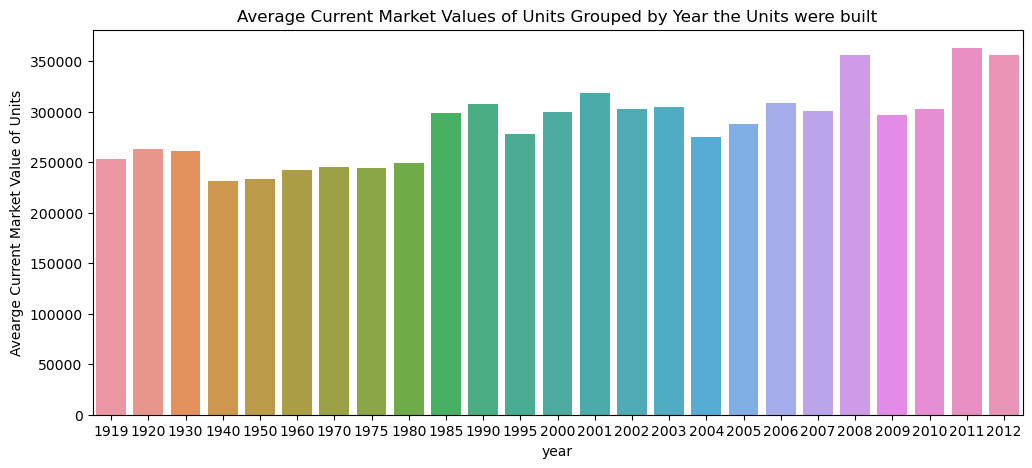

In [64]:
plt.figure(figsize=(12,5))
sns.barplot(units_df, x='year', y='yearly_avg_value')
plt.title("Average Current Market Values of Units Grouped by Year the Units were built")
plt.ylabel("Avearge Current Market Value of Units");

Current average market values for housing units range between \\$231,032 for those built in 1940 and \\$362,969 built-in 2011, an increase of about 57% in market value in housing units built in 1940. The yearly average market values for housing units built during the global financial crisis (2007 - 2009) fluctuate significantly. For housing units built in 2008, the average market values sit at about \\$356,370. However, for housing units built in 2009, the average market values drop significantly to \\$297,150, i.e. a drop of about 17%. From the above barplot, the average market value is approximately uniformly distributed throughout the years from 1919 to 2012. The average market value per housing unit is estimated to be about \\$262,686. The Variable `BUILT` will not be included in the linear regression model. No time series analysis will be discussed in this report!  

In [65]:
# Create the dummy variables for the categorical variables
region_d = pd.get_dummies(owned_single_family_housing_df['REGION'], dtype=int)
metro_d = pd.get_dummies(owned_single_family_housing_df['METRO3'], dtype=int)
adequacy_d = pd.get_dummies(owned_single_family_housing_df['ZADEQ'], dtype=int)
# Concatenate all the dummy variables into one dataframe
d_df = pd.concat([region_d, metro_d, adequacy_d], axis=1)
d_df.head()

,Midwest,Northeast,South,West,Other,central_city,Adequate,Moderately_inadequate,Severely_inadequate
0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,0,1,0,0
2,0,0,1,0,1,0,1,0,0
3,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,1,1,0,0


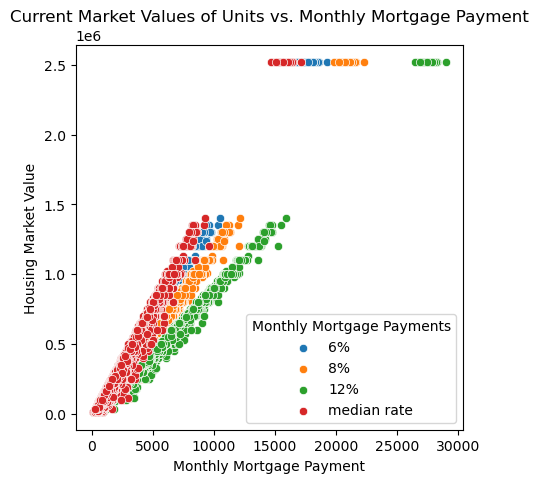

In [66]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = owned_single_family_housing_df, 
                x = owned_single_family_housing_df.COST06, 
                y = owned_single_family_housing_df.VALUE)
sns.scatterplot(data = owned_single_family_housing_df, 
                x = owned_single_family_housing_df.COST08, 
                y = owned_single_family_housing_df.VALUE)
sns.scatterplot(data = owned_single_family_housing_df, 
                x = owned_single_family_housing_df.COST12, 
                y = owned_single_family_housing_df.VALUE)
sns.scatterplot(data = owned_single_family_housing_df, 
                x = owned_single_family_housing_df.COSTMED, 
                y = owned_single_family_housing_df.VALUE)
#ax.legend(loc='lower ',ncol=4, title="Title")
plt.legend(title='Monthly Mortgage Payments', loc='lower right', 
           labels=['6%', '8%', '12%', 'median rate'])
plt.xlabel("Monthly Mortgage Payment")
plt.ylabel("Housing Market Value")
plt.title("Current Market Values of Units vs. Monthly Mortgage Payment");

As expected, from the scatterplot above, the higher the monthly motgage payment, the higher the market values of the housing units. Though this is true, however, for the purpose of our study, monthly mortgage payments will not add any information to predict the current market value (price) of the housing units. Thus, these variables will not be included in the regression model. 

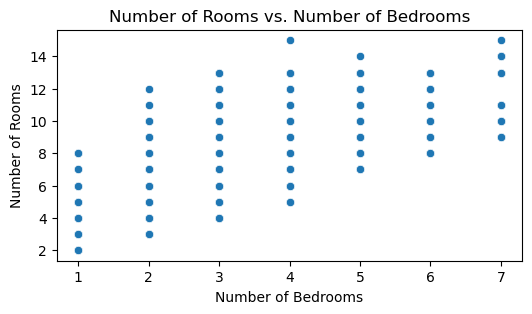

In [67]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=owned_single_family_housing_df, x="BEDRMS", y="ROOMS")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Rooms")
plt.title("Number of Rooms vs. Number of Bedrooms");

Number of rooms and number of bedrooms are highly correlated as shown in the above scatterplot, and the high correlation between the 2 variables. The Variable `BEDRMS` will be dropped to avoid multicollinearity issue. 

In [68]:
# Create a total_cost variable as follows:
owned_single_family_housing_df["total_cost"] = owned_single_family_housing_df[
    "UTILITY"] + owned_single_family_housing_df[
    "OTHERCOST"] + owned_single_family_housing_df["ZSMHC"]
owned_single_family_housing_df["ln_value"] = np.log(owned_single_family_housing_df.VALUE)

In [69]:
X = owned_single_family_housing_df.drop(columns=["VALUE", "ln_value", "UTILITY", "OTHERCOST", "ZSMHC",
            "UTILITY", "ASSISTED", "CONTROL", "NUNITS", "COST06", "COST08", "COST12", "COSTMED"])
X = pd.concat([X, d_df[['Midwest', 'Northeast', 'South', 'central_city', 'Adequate']]], axis=1)

In [70]:
# Drop the Variables REGION, ZADEQ, METRO3, STATUS
X.drop(columns=["REGION", "ZADEQ", "METRO3", "STATUS"], inplace=True)

In [71]:
X.head()

,AGE1,LMED,FMR,IPOV,BEDRMS,BUILT,ROOMS,PER,ZINC2,total_cost,Midwest,Northeast,South,central_city,Adequate
0,82,73738,956,11067,2,2006,6,1,18021,915.750000,0,1,0,0,1
1,50,55846,1100,24218,4,1980,6,4,122961,790.666667,0,0,1,0,1
2,53,55846,1100,15470,4,1985,7,2,27974,1601.500000,0,0,1,0,1
3,67,55846,949,13964,3,1985,6,2,32220,528.666667,0,0,1,0,1
4,50,60991,988,18050,3,1985,6,3,69962,1476.000000,0,0,1,1,1


In [72]:
# Correlation Matrix
corr = X.corr()
def highlight_max(s): 
    if s.dtype == 'object': 
        is_corr = [False for _ in range(s.shape[0])] 
    else: 
        is_corr = s > 0.5
    return ['color: red;' if cell else 'color:black' 
            for cell in is_corr]
corr.style.apply(highlight_max)

,AGE1,LMED,FMR,IPOV,BEDRMS,BUILT,ROOMS,PER,ZINC2,total_cost,Midwest,Northeast,South,central_city,Adequate
AGE1,1.000000,-0.010146,-0.040166,-0.440358,-0.108804,-0.138537,-0.046702,-0.401749,-0.206399,-0.237089,-0.013970,0.019804,0.000219,-0.018975,0.002276
LMED,-0.010146,1.000000,0.683971,0.078243,0.100760,-0.158059,0.123096,0.077243,0.172790,0.329919,-0.152054,0.541857,-0.372614,-0.007961,0.007868
FMR,-0.040166,0.683971,1.000000,0.216047,0.478068,-0.009525,0.349391,0.218579,0.248834,0.456375,-0.380552,0.330926,-0.197852,0.052698,0.017112
IPOV,-0.440358,0.078243,0.216047,1.000000,0.329640,0.088701,0.259868,0.989618,0.242891,0.299183,-0.014878,0.034332,-0.043398,0.004929,-0.005402
BEDRMS,-0.108804,0.100760,0.478068,0.329640,1.000000,0.141762,0.744225,0.333674,0.276075,0.350501,-0.034834,0.013665,-0.007476,-0.031947,0.031496
BUILT,-0.138537,-0.158059,-0.009525,0.088701,0.141762,1.000000,0.142026,0.088280,0.126572,0.141853,-0.089905,-0.207186,0.212904,-0.151060,0.089468
ROOMS,-0.046702,0.123096,0.349391,0.259868,0.744225,0.142026,1.000000,0.268147,0.353855,0.401176,-0.021500,0.037715,-0.016843,-0.048646,0.043317
PER,-0.401749,0.077243,0.218579,0.989618,0.333674,0.088280,0.268147,1.000000,0.242559,0.292750,-0.015877,0.035158,-0.043685,0.000784,-0.003385
ZINC2,-0.206399,0.172790,0.248834,0.242891,0.276075,0.126572,0.353855,0.242559,1.000000,0.462820,-0.049765,0.074081,-0.052341,-0.034424,0.045125
total_cost,-0.237089,0.329919,0.456375,0.299183,0.350501,0.141853,0.401176,0.292750,0.462820,1.000000,-0.131444,0.180337,-0.111354,-0.013059,0.026506


In [73]:
# From the correlation matrix above let's drop variables with correlation values greater than 0.5
X_cleaned = X.drop(columns=["BEDRMS"])

In [74]:
corr.to_csv("correlation.csv")

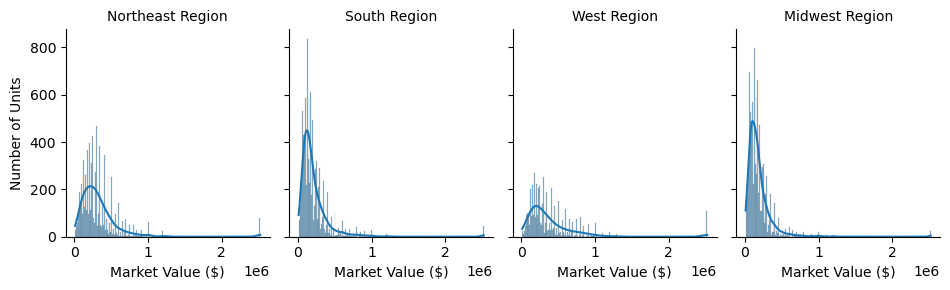

In [75]:
# Empirical distribution of the Variable "VALUE"
warnings.filterwarnings("ignore")
val = sns.displot(data=owned_single_family_housing_df, x='VALUE', height=3, aspect=0.8, 
            kde=True, col="REGION")
val.set_axis_labels("Market Value ($)", "Number of Units")
val.set_titles("{col_name} Region");

The distribution of `VALUE` is right skewed. A log transformation could help to make the distribution more bell sahped!

In [76]:
LNVALUE = np.log(owned_single_family_housing_df.VALUE)
owned_single_family_housing_df['ln_value'] = LNVALUE

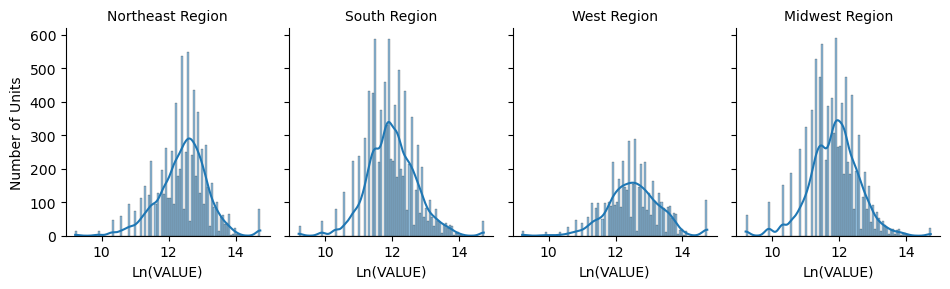

In [77]:
warnings.filterwarnings("ignore")
ln_val = sns.displot(data = owned_single_family_housing_df, x='ln_value', height=3, aspect=0.8, 
            kde=True, col="REGION")
ln_val.set_axis_labels("Ln(VALUE)", "Number of Units")
ln_val.set_titles("{col_name} Region");

After transformation, the data became normally distributed with equal mean and median of 12, and standard variation of 1. Also the distribution curve above shaow that the `ln_value` variable is normally distributed. Thus, we will use the transformed variable `ln_value` to build the linear regression model.

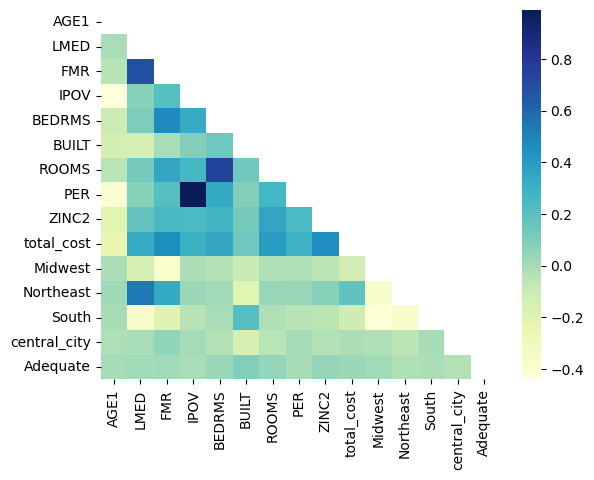

In [78]:
# lower triangular matrix
mask = np.triu(np.ones_like(X.corr()))
warnings.filterwarnings("ignore")
# plotting a triangle correlation heatmap
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True, fmt='0.1f', mask=mask);

### Linear Regression Model

In [79]:
y = owned_single_family_housing_df["VALUE"]
X_new = sm.add_constant(X_cleaned)
# Create the linear model
model = sm.OLS(y, X_new)
# Fit the model
results = model.fit()
# Print out the summary of the model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     1908.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:46:13   Log-Likelihood:            -4.1189e+05
No. Observations:               30174   AIC:                         8.238e+05
Df Residuals:                   30159   BIC:                         8.239e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.79e+05   9.79e+04      1.828      0.068   -1.29e+04    3.71e+05
AGE1          2136.8019     90.752     23.546      0.000    1958.925    2314.679
LMED            -0.0122      0.160     -0.076      0.939      -0.325       0.301
FMR            126.7216      5.442     23.285      0.000     116.055     137.388
IPOV            -9.6768      1.463     -6.615      0.000     -12.544      -6.809
BUILT         -186.8934     48.683     -3.839      0.000    -282.314     -91.473
ROOMS         1.391e+04    869.253     15.999      0.000    1.22e+04    1.56e+04
PER           2.043e+04   5991.085      3.411      0.001    8692.119    3.22e+04
ZINC2            0.4793      0.016     29.941      0.000       0.448       0.511
total_cost     114.3134      1.295     88.272      0.000     111.775     116.852
Midwest      -7.526e+04   4435.001    -16.969      0.000    -8.4e+04   -6.66e+04
Northeast    -7.382e+04   4405.075    -16.759      0.000   -8.25e+04   -6.52e+04
South        -6.273e+04   4019.413    -15.607      0.000   -7.06e+04   -5.49e+04
central_city -1.036e+04   2959.067     -3.502      0.000   -1.62e+04   -4562.801
Adequate      1.349e+04   7918.202      1.703      0.089   -2034.515     2.9e+04
==============================================================================
Omnibus:                    30606.729   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2336359.516
Skew:                           4.978   Prob(JB):                         0.00
Kurtosis:                      44.943   Cond. No.                     1.14e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# Remove variables that may cause a multicollinearity issue
X_reduced = X.drop(columns=["BEDRMS"])
# VIF dataframe 
vif_data_2 = pd.DataFrame() 
vif_data_2["feature"] = X_reduced.columns 
  
# calculating VIF for each feature 
vif_data_2["VIF"] = [variance_inflation_factor(X_reduced.values, i) 
                          for i in range(len(X_reduced.columns))] 
  
print(vif_data_2)

         feature         VIF
0           AGE1   18.989908
1           LMED   87.123319
2            FMR   38.378476
3           IPOV  528.409464
4          BUILT  220.863768
5          ROOMS   26.359082
6            PER  228.799280
7          ZINC2    2.869590
8     total_cost    5.239554
9        Midwest    4.144784
10     Northeast    3.330547
11         South    3.414944
12  central_city    1.293290
13      Adequate   43.886523


In [81]:
X_reduced["ln_total_cost"] = np.log(X_reduced.total_cost)
X_reduced["sqrt_ZINC2"] = np.sqrt(X_reduced.ZINC2)
X_reduced["ln_lmed"] = np.log(X_reduced.LMED)
X_reduced["ln_fmr"] = np.log(X_reduced.FMR)
X_reduced["ln_ipov"] = np.log(X_reduced.IPOV)
X_reduced_cleaned = X_reduced.drop(columns=["total_cost", "ZINC2", "LMED", "FMR", "IPOV"])
X_reduced_cleaned.head()

,AGE1,BUILT,ROOMS,PER,Midwest,Northeast,South,central_city,Adequate,ln_total_cost,sqrt_ZINC2,ln_lmed,ln_fmr,ln_ipov
0,82,2006,6,1,0,1,0,0,1,6.819743,134.242318,11.208274,6.862758,9.311723
1,50,1980,6,4,0,0,1,0,1,6.672876,350.657953,10.930353,7.003065,10.094851
2,53,1985,7,2,0,0,1,0,1,7.378696,167.254297,10.930353,7.003065,9.646658
3,67,1985,6,2,0,0,1,0,1,6.270358,179.499304,10.930353,6.855409,9.544238
4,50,1985,6,3,0,0,1,1,1,7.297091,264.503308,11.018482,6.895683,9.800901


In [82]:
y = owned_single_family_housing_df["ln_value"]
X_reduced_new = sm.add_constant(X_reduced_cleaned)
# Create the linear model
model_reduced = sm.OLS(y, X_reduced_new)
# Fit the model
results_reduced = model_reduced.fit()
# Print out the summary of the model results
results_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_value   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     2573.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:46:14   Log-Likelihood:                -23919.
No. Observations:               30174   AIC:                         4.787e+04
Df Residuals:                   30159   BIC:                         4.799e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1251      0.682      0.183      0.854      -1.211       1.462
AGE1              0.0068      0.000     26.339      0.000       0.006       0.007
BUILT             0.0026      0.000     20.218      0.000       0.002       0.003
ROOMS             0.0667      0.002     28.952      0.000       0.062       0.071
PER               0.0469      0.012      3.792      0.000       0.023       0.071
Midwest          -0.3301      0.012    -28.660      0.000      -0.353      -0.307
Northeast        -0.1729      0.011    -15.331      0.000      -0.195      -0.151
South            -0.2409      0.010    -23.158      0.000      -0.261      -0.221
central_city     -0.0811      0.008    -10.501      0.000      -0.096      -0.066
Adequate          0.1372      0.021      6.648      0.000       0.097       0.178
ln_total_cost     0.5033      0.007     75.331      0.000       0.490       0.516
sqrt_ZINC2        0.0012   3.06e-05     39.636      0.000       0.001       0.001
ln_lmed           0.3095      0.029     10.507      0.000       0.252       0.367
ln_fmr            0.4461      0.019     23.185      0.000       0.408       0.484
ln_ipov          -0.4627      0.061     -7.583      0.000      -0.582      -0.343
==============================================================================
Omnibus:                     2465.572   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9572.312
Skew:                          -0.345   Prob(JB):                         0.00
Kurtosis:                       5.672   Cond. No.                     4.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis of Variance

In [83]:
# Ordinary Least Squares (OLS) model
model_aov = ols('ln_value ~ C(REGION)', data = owned_single_family_housing_df).fit()
anova_table = sm.stats.anova_lm(model_aov, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(REGION),2305.719476,3.0,1395.326198,0.0
Residual,16618.230365,30170.0,NaN,NaN


In [84]:
# Independent ttest by Region
region_northwest = owned_single_family_housing_df[owned_single_family_housing_df.REGION=="Northeast"]["VALUE"]
region_west = owned_single_family_housing_df[owned_single_family_housing_df.REGION=="West"]["VALUE"]
region_south = owned_single_family_housing_df[owned_single_family_housing_df.REGION=="South"]["VALUE"]
region_midwest = owned_single_family_housing_df[owned_single_family_housing_df.REGION=="Midwest"]["VALUE"]

In [85]:
res_region = stats.tukey_hsd(region_northwest, region_west, region_south, region_midwest)
type(res_region)

scipy.stats._hypotests.TukeyHSDResult

Using Tukey HSD test, all the means of current market values are different throughout all 4 regions as shown in the table above. P-values of all groups are close to zero, and thus the null hypothesis is rejected. The null hypothesis claims that the means between two groups are equal.  

### Summary Tables

In [86]:
pd.pivot_table(owned_single_family_housing_df, values=["IPOV", "VALUE", "LMED", "FMR", 
            "total_cost", "ZINC2", "ROOMS", "PER", "ln_value"], 
               index=['REGION']).round(2).sort_values(by="VALUE").reset_index()

,REGION,FMR,IPOV,LMED,PER,ROOMS,VALUE,ZINC2,ln_value,total_cost
0,Midwest,1053.29,17654.28,65497.60,2.62,6.73,186870.77,84145.04,11.86,1502.39
1,South,1163.39,17390.63,61205.95,2.55,6.74,216831.41,83743.34,12.00,1536.89
2,Northeast,1515.51,18148.62,80309.21,2.74,6.90,328229.01,101913.84,12.44,2113.13
3,West,1585.94,18227.47,68912.90,2.76,6.80,387585.92,98622.69,12.54,1984.33


In [87]:
# Compare the mean and median of the market value of unit befor and after the log transformation
pd.pivot_table(owned_single_family_housing_df, values=["VALUE", "ln_value"], index=['REGION'], 
              aggfunc = {"ln_value": ["mean", "median"],
                         "VALUE": ["mean", "median"]}).round(2).reset_index()

REGION      VALUE           ln_value       
                   mean    median     mean median
0    Midwest  186870.77  150000.0    11.86  11.92
1  Northeast  328229.01  270000.0    12.44  12.51
2      South  216831.41  160000.0    12.00  11.98
3       West  387585.92  280000.0    12.54  12.54

Mean and median are approximately equal throughout the 4 regions after the Variable `VALUE` was log transformed. Howver, before it was transformed, the mean and median seemed to be significantly different, which implies that current market values of housing units are right skewed in this case since means are higher than medians.

### Use Scikitlearn to run the above Regression Analysis

#### Importing Required Packages

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [156]:
y = owned_single_family_housing_df["ln_value"]

In [157]:
# Sperate train and test data
X_train, X_test, y_train, y_test = train_test_split(X_reduced_cleaned, y, test_size = 0.2, random_state=42)
print("The number of samples in train set is {}".format(X_train.shape[0]))
print("The number of samples in test set is {}".format(X_test.shape[0]))

The number of samples in train set is 24139
The number of samples in test set is 6035


In [158]:
# (1) Initiate the model
lr = LinearRegression()
# (2) Fit the model
lr.fit(X_train, y_train)
# (3) Score the model
lr.score(X_test, y_test)

0.5287333822667113

In [159]:
# Coefficients
lr.coef_

array([ 0.00684111,  0.00239845,  0.06792728,  0.04411304, -0.33905494,
       -0.17960855, -0.24822985, -0.08106516,  0.14785642,  0.50224208,
        0.00123396,  0.29875615,  0.44772303, -0.44009229])

In [160]:
# Intercept
lr.intercept_

0.3579597451082446

In [161]:
# Predict
y_pred = lr.predict(X_test)
# Mean Square error
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))

Mean Squared Error 0.2888147061037005


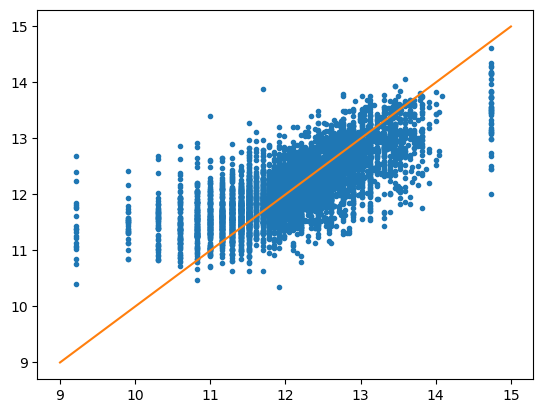

In [162]:
plt.plot(y_test, y_pred, '.')
# plot a line
x = np.linspace(9, 15, 50)
y = x
plt.plot(x, y);

In [164]:
params = np.append(lr.intercept_, lr.coef_)
params

array([ 0.35795975,  0.00684111,  0.00239845,  0.06792728,  0.04411304,
       -0.33905494, -0.17960855, -0.24822985, -0.08106516,  0.14785642,
        0.50224208,  0.00123396,  0.29875615,  0.44772303, -0.44009229])

In [169]:
new_X = np.append(np.ones((len(X_test), 1)), X_test, axis=1)
new_X[0]

array([1.00000000e+00, 5.50000000e+01, 1.95000000e+03, 9.00000000e+00,
       2.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 7.31366473e+00, 2.46752913e+02,
       1.09685258e+01, 7.01121399e+00, 9.64549372e+00])

In [170]:
MSE = (sum((y_test - y_pred)**2)) / (len(new_X) - len(new_X[0]))
MSE

0.28953434407571965

In [171]:
v_b = MSE*(np.linalg.inv(np.dot(new_X.T, new_X)).diagonal())
v_b

array([2.05849036e+00, 3.25093365e-07, 8.29152794e-08, 2.68055427e-05,
       6.20237000e-04, 6.82132546e-04, 6.50615557e-04, 5.45439704e-04,
       3.05842417e-04, 2.27099509e-03, 2.26989324e-04, 4.71487291e-09,
       4.45108265e-03, 1.90402779e-03, 1.53447322e-02])

In [172]:
se = np.sqrt(v_b)
se

array([1.43474400e+00, 5.70169593e-04, 2.87950134e-04, 5.17740695e-03,
       2.49045578e-02, 2.61176673e-02, 2.55071668e-02, 2.33546506e-02,
       1.74883509e-02, 4.76549587e-02, 1.50661649e-02, 6.86649322e-05,
       6.67164347e-02, 4.36351668e-02, 1.23873856e-01])

In [173]:
t_b = params/se
t_b

array([  0.24949381,  11.99837366,   8.32938418,  13.1199431 ,
         1.77128381, -12.98182317,  -7.04149338, -10.6287118 ,
        -4.63538035,   3.10264492,  33.33576166,  17.97080166,
         4.47799939,  10.26060092,  -3.55274553])

In [174]:
p_val = [2*(1 - stats.t.cdf(np.abs(i), (len(new_X) - len(new_X[0])))) for i in t_b]
p_val = np.round(p_val, 3)
p_val

array([0.803, 0.   , 0.   , 0.   , 0.077, 0.   , 0.   , 0.   , 0.   ,
       0.002, 0.   , 0.   , 0.   , 0.   , 0.   ])

### 2011 Explanatory Variables and 2013 Market Value Variable

- Data from 2011 and 2013 will be merged;
- The Variable `VALUE` (market value of housing units) from 2013 is the response variable;
- Explanatory variables and the market value variable (`VALUE`) from 2011 will be used to build the regression model. This way, the market value from 2011 will contribute to predict the market value in 2013;
- Data will be split - 1,000 observations will be held for testing and evaluating the model;

In [201]:
# Reread the datasets
data_2011 = pd.read_csv("thads2011.txt", sep=",", usecols=usecols)
data_2013 = pd.read_csv("thads2013.txt", sep=",", usecols=usecols)

In [202]:
df_merged_2011_2013 = data_2011.merge(data_2013[["CONTROL", "VALUE"]], on = "CONTROL")
df_merged_2011_2013.shape

(46381, 28)

In [203]:
# Rename VALUE_x and VALUE_y according to the year
df_merged_2011_2013.rename(columns={"VALUE_x": "VALUE_2011", "VALUE_y": "VALUE_2013"}, inplace=True)

In [204]:
# Keep VALUE_2011 and VALUE_2013 that are $1000 or more
df_merged_2011_2013_sub = df_merged_2011_2013[(df_merged_2011_2013["VALUE_2011"]>= 1000) & (df_merged_2011_2013["VALUE_2013"]>= 1000)]
df_merged_2011_2013_sub.shape

(24657, 28)

In [240]:
# Owned single family housing units 
owned_single_family_units = df_merged_2011_2013_sub[(df_merged_2011_2013_sub.TYPE==1) & (df_merged_2011_2013_sub.STRUCTURETYPE==1) & (df_merged_2011_2013_sub.OWNRENT=="'1'")]  
owned_single_family_units.shape

(22232, 28)

In [254]:
owned_single_family_units_df1 = owned_single_family_units.drop(columns=["CONTROL", "TYPE", "STRUCTURETYPE", "COST06", "COST12", 
                                            "COST08", "COSTMED", "OWNRENT", "NUNITS", "ASSISTED", "STATUS", "ZSMHC"])
owned_single_family_units_df1.columns

Index(['AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'IPOV', 'PER', 'ZINC2',
       'ZADEQ', 'BEDRMS', 'BUILT', 'VALUE_2011', 'ROOMS', 'UTILITY',
       'OTHERCOST', 'VALUE_2013'],
      dtype='object')

In [323]:
# Keep only positive values fore the variables "AGE1", "IPOV", etc.
owned_single_family_units_df2 = owned_single_family_units_df1[(
    owned_single_family_units_df1.AGE1>0) & (
    owned_single_family_units_df1.IPOV>0) & (
    owned_single_family_units_df1.PER>0) & (
    owned_single_family_units_df1.ZINC2>0) & (
    owned_single_family_units_df1.UTILITY>0) & (
    owned_single_family_units_df1.OTHERCOST>0)
].reset_index(drop=True)
owned_single_family_units_df2.head()

,AGE1,METRO3,REGION,LMED,FMR,IPOV,PER,ZINC2,ZADEQ,BEDRMS,BUILT,VALUE_2011,ROOMS,UTILITY,OTHERCOST,VALUE_2013
0,40,'5','3',55770,1003,11572,1,44982,'1',4,1980,125000,8,220.500000,41.666667,130000
1,65,'5','3',55770,895,13403,2,36781,'1',3,1985,250000,5,230.000000,40.333333,200000
2,48,'1','3',62084,935,17849,3,57446,'1',3,1985,169000,6,236.333333,108.333333,260000
3,58,'5','4',53995,1224,14895,2,129964,'1',3,1985,140000,7,217.666667,55.000000,170000
4,57,'5','3',55770,895,14849,2,258664,'1',3,1985,225000,5,187.000000,45.833333,230000


In [324]:
owned_single_family_units_df2.shape

(20821, 16)

In [325]:
# Log-transform a number of explanatory variables and the response variable "VALUE_2013"
variables = owned_single_family_units_df2[["LMED", "ZINC2", "FMR", "UTILITY", "OTHERCOST","VALUE_2011", "VALUE_2013"]]
features_transformed = np.log(variables)
features_transformed.tail()

,LMED,ZINC2,FMR,UTILITY,OTHERCOST,VALUE_2011,VALUE_2013
20816,11.138348,11.512385,7.029088,5.468763,3.624341,11.918391,12.206073
20817,11.018629,9.862666,6.698268,5.335934,4.335110,12.388394,12.429216
20818,11.018629,10.735222,7.074117,5.542243,3.555348,11.849398,11.918391
20819,11.018629,10.125190,7.255591,5.519793,3.314186,11.608236,12.301383
20820,11.018629,9.902587,7.074117,6.080696,3.912023,11.849398,12.388394


In [380]:
# Drop the above columns from the owned_single_family_units_df2 dataframe then concatenate the above transformed dataframe to it
cols = ["LMED", "ZINC2", "FMR", "IPOV", "UTILITY", "OTHERCOST", "VALUE_2011", "VALUE_2013"]
owned_single_family_units_df3 = owned_single_family_units_df2.drop(columns = cols)
owned_single_family_units_df4 = pd.concat([owned_single_family_units_df3, features_transformed], axis=1)
owned_single_family_units_df4.head()

,AGE1,METRO3,REGION,PER,ZADEQ,BEDRMS,BUILT,ROOMS,LMED,ZINC2,FMR,UTILITY,OTHERCOST,VALUE_2011,VALUE_2013
0,40,'5','3',1,'1',4,1980,8,10.928991,10.714018,6.910751,5.395898,3.729701,11.736069,11.775290
1,65,'5','3',2,'1',3,1985,5,10.928991,10.512737,6.796824,5.438079,3.697178,12.429216,12.206073
2,48,'1','3',3,'1',3,1985,6,11.036244,10.958601,6.840547,5.465243,4.685213,12.037654,12.468437
3,58,'5','4',2,'1',3,1985,7,10.896647,11.775013,7.109879,5.382965,4.007333,11.849398,12.043554
4,57,'5','3',2,'1',3,1985,5,10.928991,12.463285,6.796824,5.231109,3.825012,12.323856,12.345835


In [381]:
# Replace codes with the corresponding value
owned_single_family_units_df4.replace({"REGION":{"'1'": "Northeast", "'2'": "Midwest", 
                                                 "'3'": "South", "'4'": "West"}}, inplace = True)
owned_single_family_units_df4["METRO3"] = np.where(owned_single_family_units_df4.METRO3 == "'1'",
                                                   "Metro", "Other")
owned_single_family_units_df4.replace({"ZADEQ":{"'1'": "Adequate", "'2'": "Moderately_inadequate",
                    "'3'": "Severely_inadequate", "'-6'": "Vacant_No_Info"}}, inplace = True)
owned_single_family_units_df4.tail()

,AGE1,METRO3,REGION,PER,ZADEQ,BEDRMS,BUILT,ROOMS,LMED,ZINC2,FMR,UTILITY,OTHERCOST,VALUE_2011,VALUE_2013
20816,42,Other,Northeast,4,Adequate,3,1970,4,11.138348,11.512385,7.029088,5.468763,3.624341,11.918391,12.206073
20817,72,Metro,West,1,Adequate,2,1985,6,11.018629,9.862666,6.698268,5.335934,4.335110,12.388394,12.429216
20818,55,Metro,West,5,Adequate,3,1960,8,11.018629,10.735222,7.074117,5.542243,3.555348,11.849398,11.918391
20819,26,Metro,West,3,Adequate,4,2008,6,11.018629,10.125190,7.255591,5.519793,3.314186,11.608236,12.301383
20820,48,Metro,West,1,Adequate,3,1950,5,11.018629,9.902587,7.074117,6.080696,3.912023,11.849398,12.388394


In [382]:
# Create the dummy variables for the categorical variables
region = pd.get_dummies(owned_single_family_units_df4['REGION'], dtype=int)
metro = pd.get_dummies(owned_single_family_units_df4['METRO3'], dtype=int)
adequacy = pd.get_dummies(owned_single_family_units_df4['ZADEQ'], dtype=int)
# Concatenate all the dummy variables into one dataframe
dummies_df = pd.concat([region, metro, adequacy], axis=1)
dummies_df.head()

,Midwest,Northeast,South,West,Metro,Other,Adequate,Moderately_inadequate,Severely_inadequate
0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,0,1,1,0,0
2,0,0,1,0,1,0,1,0,0
3,0,0,0,1,0,1,1,0,0
4,0,0,1,0,0,1,1,0,0


In [432]:
X_mat = owned_single_family_units_df4.drop(columns=["VALUE_2013", "METRO3", "REGION", "ZADEQ"])
X_mat = pd.concat([X_mat, dummies_df[['Midwest', 'Northeast', 'South', 'Metro', 'Adequate']]], axis=1)

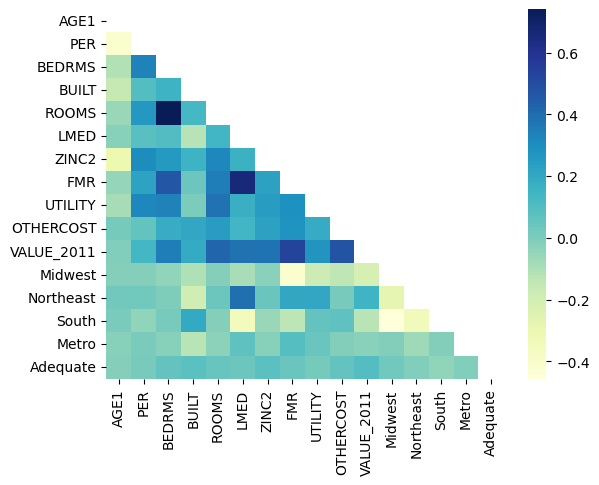

In [439]:
# lower triangular matrix
mask2 = np.triu(np.ones_like(X_mat.corr()))
warnings.filterwarnings("ignore")
# plotting a triangle correlation heatmap
sns.heatmap(X_mat.corr(), cmap="YlGnBu", annot=True, fmt='0.1f', mask=mask2)
plt.savefig("corrMatrix.png");

In [384]:
y_resp = owned_single_family_units_df4["VALUE_2013"]

In [385]:
test_size = round(1000 / owned_single_family_units_df4.shape[0],4)
test_size

0.048

In [386]:
# Separate the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X_mat, y_resp, test_size = test_size, random_state=42)
print("The number of samples in train set is {}".format(X2_train.shape[0]))
print("The number of samples in test set is {}".format(X2_test.shape[0]))

The number of samples in train set is 19821
The number of samples in test set is 1000


In [441]:
X2_train.to_csv("training_inputs.csv")
y2_train.to_csv("training_response.csv")
X2_test.to_csv("test_inputs.csv")
y2_test.to_csv("test_response.csv")

In [437]:
descriptive_stats = pd.concat([y2_train.describe(), X2_train.describe()], axis=1)
descriptive_statistics = descriptive_stats.rename(columns={"VALUE_2013": "ln_value_2013"})
descriptive_statistics.to_csv("descriptive_stats.csv")

In [387]:
# (1) Initiate the model
lr2 = LinearRegression()
# (2) Fit the model
lr2.fit(X2_train, y2_train)
# (3) Score the model
round(lr2.score(X2_test, y2_test),2)

0.61

In [388]:
params2 = np.append(lr2.intercept_, lr2.coef_)
params2

array([-4.15115916e+00,  8.47991382e-04, -8.45210427e-03, -3.93258886e-02,
        1.91488892e-03,  4.77613216e-02,  1.59614781e-01,  5.29324517e-02,
        3.69681281e-01,  5.34945627e-02,  7.14752260e-03,  5.83990141e-01,
       -9.61762889e-02, -7.98542103e-02, -1.07717874e-01, -4.43225115e-02,
        2.29460839e-02])

In [389]:
# Predict
y2_pred = lr2.predict(X2_test)
# Mean Square error
mse2 = metrics.mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error {}".format(mse2))

Mean Squared Error 0.22820281510477217


In [443]:
pd.DataFrame(y2_pred).to_csv("predicted.csv")

In [430]:
# Mean Absolute Difference
round((np.abs(np.exp(y2_test) - np.exp(y2_pred))).mean())

72729

In [390]:
new_X2 = np.append(np.ones((len(X2_test), 1)), X2_test, axis=1)
new_X2[0]

array([1.00000000e+00, 3.90000000e+01, 5.00000000e+00, 4.00000000e+00,
       1.97000000e+03, 7.00000000e+00, 1.08573245e+01, 1.08546820e+01,
       6.85856503e+00, 6.12249281e+00, 4.60517019e+00, 1.14075649e+01,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00])

In [391]:
# Varriance
v_b2 = mse2*(np.linalg.inv(np.dot(new_X2.T, new_X2)).diagonal())
# Standard error
se2 = np.sqrt(v_b2)
# t-statistics
t_b2 = params2/se2
# p-values
p_val2 = [2*(1 - stats.t.cdf(np.abs(i), (len(new_X2) - len(new_X2[0])))) for i in t_b2]
p_val2 = np.round(p_val2, 3)
p_val2

array([0.02 , 0.449, 0.508, 0.22 , 0.002, 0.002, 0.275, 0.002, 0.   ,
       0.189, 0.732, 0.   , 0.117, 0.168, 0.032, 0.251, 0.812])

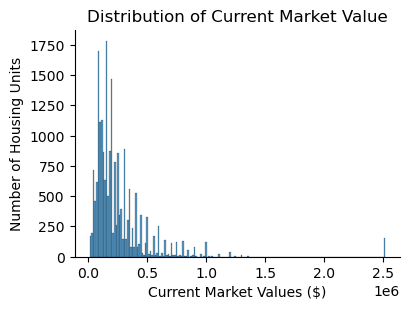

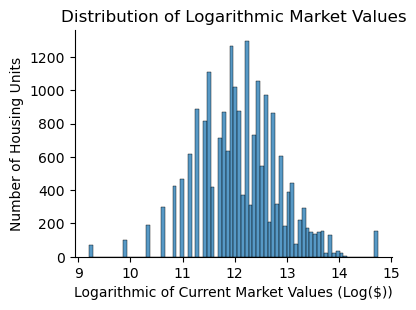

In [438]:
warnings.filterwarnings("ignore")
sns.displot(data=owned_single_family_units_df2, x='VALUE_2013', height=3, aspect=1.4, kde=False)
plt.xlabel("Current Market Values ($)")
plt.ylabel("Number of Housing Units")
plt.title("Distribution of Current Market Value")
plt.savefig("value2013.png")
sns.displot(data=owned_single_family_units_df4, x='VALUE_2013', height=3, aspect=1.4, kde=False)
plt.title("Distribution of Logarithmic Market Values")
plt.xlabel("Logarithmic of Current Market Values (Log($))")
plt.ylabel("Number of Housing Units")
plt.savefig("logvalue2013.png");

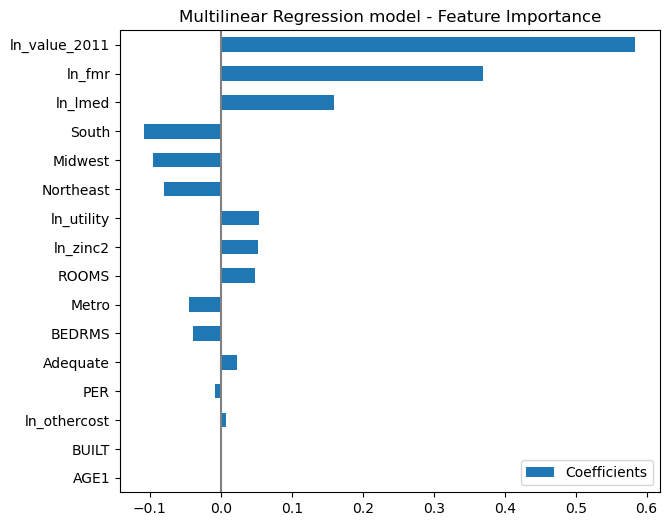

In [440]:
# Let's first rename the features that were logarithmically transformed
X2_train.rename(columns={"VALUE_2011": "ln_value_2011", "UTILITY": "ln_utility", "OTHERCOST": "ln_othercost",
                         "LMED": "ln_lmed", "FMR": "ln_fmr", "ZINC2": "ln_zinc2"}, inplace = True)

coefs = pd.DataFrame(lr2.coef_, columns=["Coefficients"], index=X2_train.columns)

coefs_sorted = coefs.sort_values(by="Coefficients", key=abs, ascending=True)

coefs_sorted.plot(kind="barh", figsize=(9, 6))
plt.title("Multilinear Regression model - Feature Importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.savefig("featureImportance.png")

In [417]:
# Feature importance
coefs.sort_values(by="Coefficients", key=abs, ascending=False)

,Coefficients
ln_value_2011,0.583990
ln_fmr,0.369681
ln_lmed,0.159615
South,-0.107718
Midwest,-0.096176
Northeast,-0.079854
ln_utility,0.053495
ln_zinc2,0.052932
ROOMS,0.047761
Metro,-0.044323
